## NumPy Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Types of Arrays

In [11]:
a1 = np.random.random(5) # Array of 5 random numbers within range [0, 1).
a2 = np.random.randn(5) # Array of 7 random numbers from a normal/Gaussian distribution.
a3 = np.zeros(2) # Array of 2 zeros.
a4 = np.ones(8) # Array of 8 ones.
a5 = np.linspace(0, 10, 20) # Array of 20 elements from [0, 10].
a6 = np.arange(0, 10, 0.2) # Array of elements from [0,10) with a step size of 0.2.
a7 = np.array([1,5,9,4,2])
a8 = np.random.randint(4)

## Array Operations

In [ ]:
2*a4 # Can do the arithmetic operations (multiplication, division, etc.).

array([2., 2., 2., 2., 2., 2., 2., 2.])

In [24]:
1/a1

array([2.77559156, 1.62671062, 3.06477649, 1.39262623, 5.12320819])

In [12]:
a7 >= 5

array([False,  True,  True, False, False])

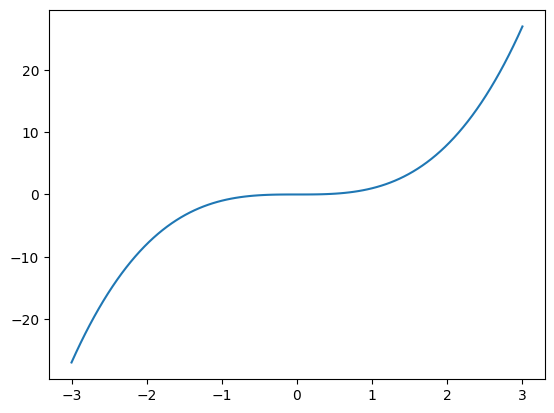

In [13]:
x = np.linspace(-3, 3, 100)
y = x**3
plt.plot(x, y)
plt.show()

## Array Indexing/Slicing

In [14]:
a7[2]

np.int64(9)

In [17]:
a7[::2]

array([1, 9, 2])

In [18]:
a7[a7>5]

array([9])

In [19]:
a7[2:5]

array([9, 4, 2])

In [24]:
states = np.array(['California', 'Texas', 'Florida', 'New York'])
first_letter = np.vectorize(lambda s: s[-1])(states) == 'a' # vectorize() acts like a for loop, applying the lambda function to the states array.
states[first_letter]

array(['California', 'Florida'], dtype='<U10')

In [27]:
a7[a7 % 2 == 0]

array([4, 2])

## Calculus & Statistics

In [36]:
seconda1 = 2*a1 + 10 # 2 expands standard deviation while 10 shifts the mean.
seconda1

array([11.79943315, 11.26441824, 11.71600478, 10.61588935, 11.53870919])

Mean, percentile, standard deviation

In [31]:
np.mean(seconda1)

np.float64(11.386890943110544)

In [32]:
np.std(seconda1)

np.float64(0.4268486375285263)

In [39]:
np.percentile(seconda1, 90) # Integer represents a percentage.

np.float64(11.766061803863607)

Derivative and Antiderivative

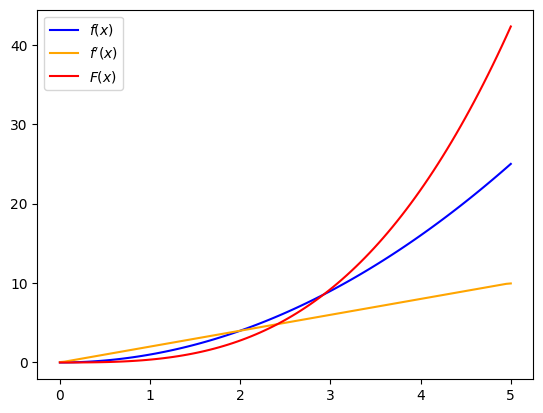

In [58]:
x = np.linspace(0, 5, 100)
y = x**2

integral = np.cumsum(y) * (x[1] - x[0])
dydx = np.gradient(y, x)

plt.plot(x, y, color = 'blue', label = '$f(x)$')
plt.plot(x, dydx, color = 'orange', label = "$f'(x)$")
plt.plot(x, integral, color = 'red', label = '$F(x)$')
plt.legend()

## Question 1

Let $y = e^{-x/10} \sin(x)$. Consider 10000 intervals in the range $[0, 10]$

1. Plot the function y vs x from $[0, 10]$
2. Compute mean & standard deviation for y-values in $[4, 7]$
3. For x in the range $[4, 7]$, find the value $y_m$ such that 80% of the values are less than it.
4. Plot dydx vs x
5. Find the locations where dydx = 0

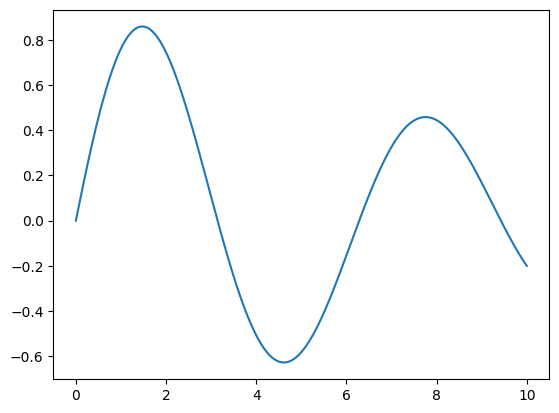

In [ ]:
# 1.
x = np.linspace(0, 10, 10001)
y = np.exp(-x/10) * np.sin(x)
plt.plot(x, y)

In [72]:
# 2.
m = np.mean(y[(x >= 4) & (x <= 7)])
s = np.std(y[(x >= 4) & (x <= 7)])
print(m, s)

-0.2956023068963138 0.31448753875085117


In [73]:
# 3.
y_m = np.percentile(y[(x >= 4) & (x <= 7)], 80)
y_m

np.float64(0.06145551274590662)

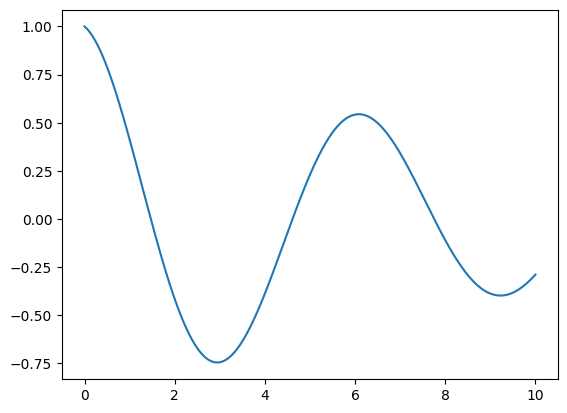

In [77]:
# 4.
dydx = np.gradient(y, x)
plt.plot(x, dydx)

In [91]:
x[1:][dydx[1:]*dydx[:-1] < 0]


array([1.472, 4.613, 7.755])

## Question 2

Sum every number together 0 to 10000 except for those that are divisible by 4 or 7. Do this in 2 lines of code.

In [102]:
nums = np.arange(0, 10001, 1)
print(f"{int(sum(nums[(nums % 4 != 0) & (nums % 7 != 0)])):,}")

32,147,142


## Question 3

Consider the flower petal $r(\theta) = 1 + \frac{3}{4} \cos(5\theta)$ for $0 \le \theta \le 2\pi$

1. Make a plot of the flower (find x and y points)
2. Compute the area.
3. Compute the arc length.

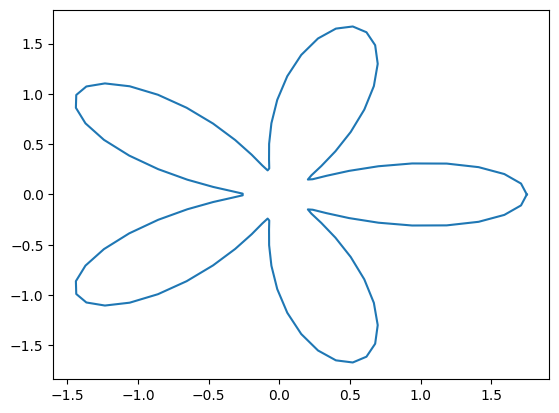

In [105]:
# 1. 
theta = np.linspace(0, 2*np.pi, 100)
r = 1 + (3/4)*np.cos(5*theta)
x = r * np.cos(theta)
y = r * np.sin(theta)
plt.plot(x, y)

In [110]:
# 2. 
A = (1/2) * sum(r)**2 * (theta[1] - theta[0])
float(A)

322.11043009903057

In [117]:
# 3. 
l = sum(np.sqrt(r**2 + np.gradient(r, theta)**2)) * (theta[1] - theta[0])
float(l)

16.861418228948512

## Multidimensional Arrays

In [121]:
a1 = np.array([[1,2,3],[4,5,6],[7,8,9]]) # All array operations work the same as 1D arrays.
a1

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

The ravel() method can turn any multidimensional array into a 1D array.

In [120]:
a1.ravel()

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

Element indexing is slightly more convoluted.

In [126]:
a1[:,1] # The comma is like a condition. In this case, it's an instruction to take the 2nd element of each row.

array([2, 5, 8])

In [130]:
a1[1:, :1]

array([[4],
       [7]])

## 2D Functions

In [139]:
x = np.linspace(-10, 10, 1000)
y = np.linspace(-10, 10, 1000)

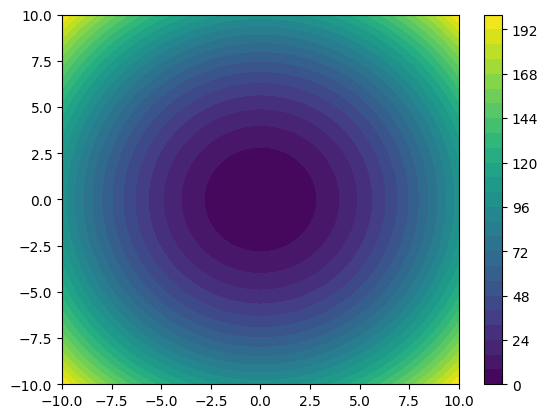

In [140]:
xv, yv = np.meshgrid(x, y) # Meshgrids create a rectangular grid using x and y-coordinates.
zv = xv**2 + yv**2

plt.contourf(xv, yv, zv, levels = 30)
plt.colorbar()

## Linear Algebra

In [ ]:
a1 = np.array([[1,2,3],[4,5,6],[7,8,9]])
b1 = np.array([1, 2, 3])

In [144]:
a1@b1 # Multiplies the matrix with vector

array([14, 32, 50])

In [146]:
a1.T # Transposes the matrix, switching rows and columns

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

# Systems of Equations

$2x + 5y = 19$

$x - 2y = -4$

In [147]:
leftcoeff = np.array([[2, 5],[1, -2]])
rightcoeff = np.array([19, -4])

In [148]:
np.linalg.solve(leftcoeff, rightcoeff)

array([2., 3.])

# Eigenvalues & Eigenvectors

In [151]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])

In [ ]:
w, v = np.linalg.eig(A)

In [ ]:
v1 = v[:, 0]
v1

array([-0.23197069, -0.52532209, -0.8186735 ])

In [162]:
A@v1

array([ -3.73863537,  -8.46653421, -13.19443305])

In [ ]:
w[2] * v1 # Any index works here. Matrix A * eigenvector v1 = eigenvalue from array w * eigenvector v1

array([ -3.73863537,  -8.46653421, -13.19443305])

## Question 1

Let $f(x,y) = e^{-(x^2 + y^2)} \sin(x)$ for $-2 \le x \le 2$ and $-2 \le y \le 2$

1. Make a contour plot of f
2. Find the volume of $|f(x, y)|$ in the specified x and y range
3. Find the volume only in the region where $\sqrt{x^2 + y^2} > 0.5$

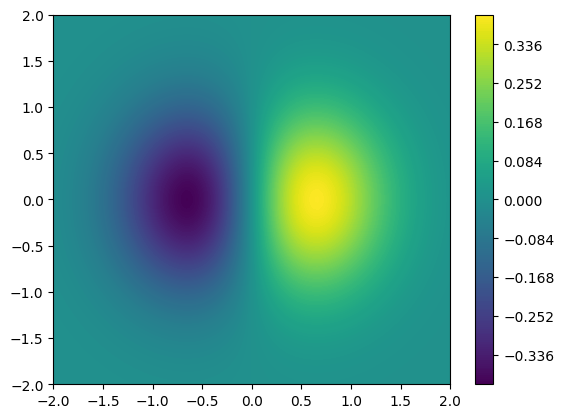

In [170]:
# 1.
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)

xv, yv = np.meshgrid(x, y)
f = np.exp(-(xv**2 + yv**2)) * np.sin(xv)

plt.contourf(xv, yv, f, levels = 200)
plt.colorbar()

In [177]:
# 2.
sum(np.abs(f.ravel())) * np.diff(x)[0] * np.diff(y)[0] # np.diff gives the difference between each element which should be equal due to the np.linspace.

np.float64(1.4880032445474112)

In [178]:
# 3.
sum(np.abs(f[xv**2 + yv**2 > 0.5**2].ravel())) * np.diff(x)[0] * np.diff(y)[0]

np.float64(1.3447430082080258)